## The project requires to put ourself in the shoes of an HR analytics expert by leveraging the data provided, we are supposed to identify how salary is varying with respect to other considerable factors.

### The data for the same is being imported and the feauture description of all the columns is as below.

#### Feature Description

1. Gender - talks of the gender - Male or female
2. Business - if the person has a business or no
3. Age - age of the person
4. Salary - CTC of the employee
5. Dependants - number of people dependant on the person
6. Months - duration of the person employed with the company
7. Calls - if the person has authority to make calls or not
8. Type - salary settlement type
9. Billing - Subscribed to billing plans or no
10. Unit sales - unit sale made by the person
11. Total sales - total sales made by the person
12. Rating - If he has been given a rating by a superior or no
13. Bonus - amount received by a person as bonus for sales
14. Base pay - Base pay of the employee
15. Unit price - The Unit price of a sale
16. Volume - volume allotted to a person
17. Opening balance - The opening balance of an employee
18. Low - lowest balance allotted to a person.
19. Closing Balance- The closing balance of an employee
20. Education- Educational background of an employee

In [1]:
# importing libraries
# importing numpy for numerical analysis, pandas for being able to read tables into Python and take action on the same, matplotlib and seaborn for data visualization.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Understand the data set - Feature description provided below.

In [2]:
# Reading the provided dataseet and using .head() to view the column names and first 5 values for each column.

HR_dataset = pd.read_csv('New_data_Set.csv')
HR_dataset.head()

,Gender,Business,Dependancies,Calls,Type,Billing,Rating,Age,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months,Education
0,Female,0,No,Yes,Month-to-month,No,Yes,18,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0,High School or less
1,Female,0,No,Yes,Month-to-month,No,Yes,19,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0,High School or less
2,Male,0,No,Yes,Month-to-month,Yes,No,22,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0,High School or less
3,Female,1,No,Yes,Month-to-month,Yes,Yes,21,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19,0,High School or less
4,Male,0,No,Yes,Month-to-month,Yes,Yes,23,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1,High School or less


In [3]:
# Info gives us the total Non-Null Count and datatypes for each column. 

HR_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          5000 non-null   object 
 1   Business        5000 non-null   int64  
 2   Dependancies    5000 non-null   object 
 3   Calls           5000 non-null   object 
 4   Type            5000 non-null   object 
 5   Billing         5000 non-null   object 
 6   Rating          5000 non-null   object 
 7   Age             5000 non-null   int64  
 8   Salary          5000 non-null   float64
 9   Base_pay        4977 non-null   float64
 10  Bonus           5000 non-null   float64
 11  Unit_Price      5000 non-null   float64
 12  Volume          5000 non-null   int64  
 13  openingbalance  3524 non-null   float64
 14  closingbalance  5000 non-null   float64
 15  low             5000 non-null   float64
 16  Unit_Sales      5000 non-null   float64
 17  Total_Sales     4992 non-null   o

In [4]:
# isnull.sum() is used to give a columnwise count for the total sum of all the null values.

HR_dataset.isnull().sum()

Gender               0
Business             0
Dependancies         0
Calls                0
Type                 0
Billing              0
Rating               0
Age                  0
Salary               0
Base_pay            23
Bonus                0
Unit_Price           0
Volume               0
openingbalance    1476
closingbalance       0
low                  0
Unit_Sales           0
Total_Sales          8
Months               0
Education            0
dtype: int64

In [5]:
# .nunique() returns all the columnwise distinct values in a dataset.

HR_dataset.nunique()

Gender               2
Business             2
Dependancies         2
Calls                2
Type                 3
Billing              2
Rating               2
Age                 65
Salary            5000
Base_pay          4883
Bonus             5000
Unit_Price        3836
Volume            4831
openingbalance    2986
closingbalance    4011
low               4014
Unit_Sales        1434
Total_Sales       4706
Months              73
Education            4
dtype: int64

In [6]:
# As per the dataset, we can infer that ["Gender", "Business", "Age", "Dependancies","Education"] do not impact the salary (which is the key column to be considered)and hence can be dropped to have a more cleaner & smaller dataset.

HR_dataset = HR_dataset.drop(columns=["Gender", "Business", "Age", "Dependancies","Education"])
HR_dataset.head()

,Calls,Type,Billing,Rating,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Total_Sales,Months
0,Yes,Month-to-month,No,Yes,5089.00,2035.600,254.4500,3.77,21226600,3.75,3.76,3.65,18.25,18.8,0
1,Yes,Month-to-month,No,Yes,5698.12,2279.248,284.9060,3.74,10462800,3.85,3.68,3.65,18.40,18.85,0
2,Yes,Month-to-month,Yes,No,5896.65,2358.660,294.8325,3.89,18761000,4.23,4.29,3.72,18.70,18.9,0
3,Yes,Month-to-month,Yes,Yes,6125.12,2450.048,306.2560,4.35,66130600,4.26,4.31,3.83,18.75,19,0
4,Yes,Month-to-month,Yes,Yes,6245.00,2498.000,312.2500,4.34,26868200,4.79,4.41,4.08,18.80,19.05,1


## Find out the correlation between variables using spearman rank correlation & explain.

In [7]:
# Using Spearman correlation technique to check for correlation between the numerical columns.
# The values with correlation above 0.75 or 75% i.e., values closer to 1 are highly correlated.

HR_dataset.corr(method='spearman')

,Salary,Base_pay,Bonus,Unit_Price,Volume,openingbalance,closingbalance,low,Unit_Sales,Months
Salary,1.000000,0.999976,1.000000,0.811713,-0.390488,0.297932,0.346498,0.999859,0.999997,0.603796
Base_pay,0.999976,1.000000,0.999976,0.811679,-0.390787,0.291481,0.339959,0.999832,0.999973,0.599535
Bonus,1.000000,0.999976,1.000000,0.811713,-0.390488,0.297932,0.346498,0.999859,0.999997,0.603796
Unit_Price,0.811713,0.811679,0.811713,1.000000,-0.324230,0.172338,0.263699,0.812412,0.811735,0.550062
Volume,-0.390488,-0.390787,-0.390488,-0.324230,1.000000,-0.024988,-0.147108,-0.392209,-0.390505,-0.262077
openingbalance,0.297932,0.291481,0.297932,0.172338,-0.024988,1.000000,0.288672,0.297840,0.297938,-0.003899
closingbalance,0.346498,0.339959,0.346498,0.263699,-0.147108,0.288672,1.000000,0.346278,0.346485,0.365927
low,0.999859,0.999832,0.999859,0.812412,-0.392209,0.297840,0.346278,1.000000,0.999856,0.603752
Unit_Sales,0.999997,0.999973,0.999997,0.811735,-0.390505,0.297938,0.346485,0.999856,1.000000,0.603779
Months,0.603796,0.599535,0.603796,0.550062,-0.262077,-0.003899,0.365927,0.603752,0.603779,1.000000


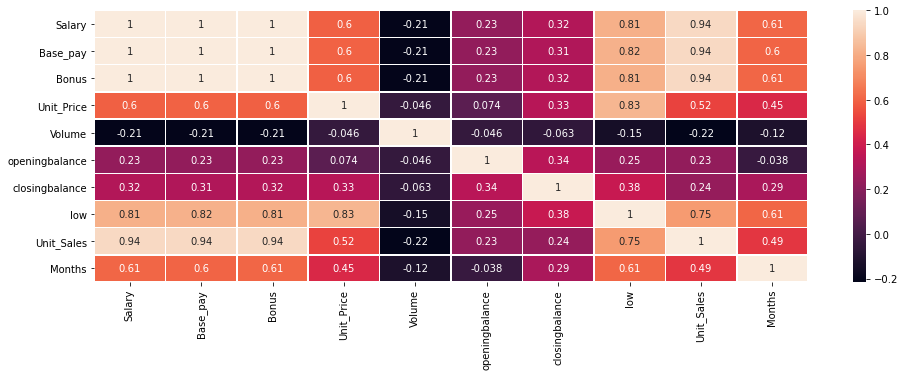

In [8]:
# Plotting heatmap to check for correlation between the numerical columns.
# The values with correlation above 75% i.e., values closer to 1 are highly correlated.
# This plot helps us drop columns with poor correlation.

plt.figure(figsize = (16,5))
sns.heatmap(HR_dataset.corr(), annot = True, linewidth = 0.5);

In [9]:
# Dropping poorly correlated columns post correlation analysis.

HR_dataset = HR_dataset.drop(columns=["openingbalance", "closingbalance", "Volume"])
HR_dataset.head()

,Calls,Type,Billing,Rating,Salary,Base_pay,Bonus,Unit_Price,low,Unit_Sales,Total_Sales,Months
0,Yes,Month-to-month,No,Yes,5089.00,2035.600,254.4500,3.77,3.65,18.25,18.8,0
1,Yes,Month-to-month,No,Yes,5698.12,2279.248,284.9060,3.74,3.65,18.40,18.85,0
2,Yes,Month-to-month,Yes,No,5896.65,2358.660,294.8325,3.89,3.72,18.70,18.9,0
3,Yes,Month-to-month,Yes,Yes,6125.12,2450.048,306.2560,4.35,3.83,18.75,19,0
4,Yes,Month-to-month,Yes,Yes,6245.00,2498.000,312.2500,4.34,4.08,18.80,19.05,1


In [10]:
# using info to check if the new dataset has dropped all the above columns.

HR_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Calls        5000 non-null   object 
 1   Type         5000 non-null   object 
 2   Billing      5000 non-null   object 
 3   Rating       5000 non-null   object 
 4   Salary       5000 non-null   float64
 5   Base_pay     4977 non-null   float64
 6   Bonus        5000 non-null   float64
 7   Unit_Price   5000 non-null   float64
 8   low          5000 non-null   float64
 9   Unit_Sales   5000 non-null   float64
 10  Total_Sales  4992 non-null   object 
 11  Months       5000 non-null   int64  
dtypes: float64(6), int64(1), object(5)
memory usage: 468.9+ KB


In [11]:
# checking for the remaining null values after column dropping.

HR_dataset.isnull().sum()

Calls           0
Type            0
Billing         0
Rating          0
Salary          0
Base_pay       23
Bonus           0
Unit_Price      0
low             0
Unit_Sales      0
Total_Sales     8
Months          0
dtype: int64

## Clean and pre-process the data with other operations required, like, missing values, handling outliers, etc. as and when necessary & explain.

In [12]:
# We can see that basepay is 40% of salary and hence creating a new column for base pay using the below formulae.
# This was required as there were null values in the base pay column.

HR_dataset['base_pay']=HR_dataset['Salary']*40/100

In [13]:
# Dropping the previous Base pay column as the new one has replaced it with the same data without any null values.

HR_dataset = HR_dataset.drop('Base_pay',axis=1)

In [14]:
# using .head() to view the first five values of the updated dataset.

HR_dataset.head()

,Calls,Type,Billing,Rating,Salary,Bonus,Unit_Price,low,Unit_Sales,Total_Sales,Months,base_pay
0,Yes,Month-to-month,No,Yes,5089.00,254.4500,3.77,3.65,18.25,18.8,0,2035.600
1,Yes,Month-to-month,No,Yes,5698.12,284.9060,3.74,3.65,18.40,18.85,0,2279.248
2,Yes,Month-to-month,Yes,No,5896.65,294.8325,3.89,3.72,18.70,18.9,0,2358.660
3,Yes,Month-to-month,Yes,Yes,6125.12,306.2560,4.35,3.83,18.75,19,0,2450.048
4,Yes,Month-to-month,Yes,Yes,6245.00,312.2500,4.34,4.08,18.80,19.05,1,2498.000


In [15]:
# Replacing na(null) values with mean for the Total_Sales column.

HR_dataset['Total_Sales'] = pd.to_numeric(HR_dataset['Total_Sales'],errors = 'coerce')
HR_dataset['Total_Sales'].fillna (value = HR_dataset['Total_Sales'].mean(), inplace = True)
HR_dataset.head()

,Calls,Type,Billing,Rating,Salary,Bonus,Unit_Price,low,Unit_Sales,Total_Sales,Months,base_pay
0,Yes,Month-to-month,No,Yes,5089.00,254.4500,3.77,3.65,18.25,18.80,0,2035.600
1,Yes,Month-to-month,No,Yes,5698.12,284.9060,3.74,3.65,18.40,18.85,0,2279.248
2,Yes,Month-to-month,Yes,No,5896.65,294.8325,3.89,3.72,18.70,18.90,0,2358.660
3,Yes,Month-to-month,Yes,Yes,6125.12,306.2560,4.35,3.83,18.75,19.00,0,2450.048
4,Yes,Month-to-month,Yes,Yes,6245.00,312.2500,4.34,4.08,18.80,19.05,1,2498.000


In [16]:
# Checking if the changes are visible.

HR_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Calls        5000 non-null   object 
 1   Type         5000 non-null   object 
 2   Billing      5000 non-null   object 
 3   Rating       5000 non-null   object 
 4   Salary       5000 non-null   float64
 5   Bonus        5000 non-null   float64
 6   Unit_Price   5000 non-null   float64
 7   low          5000 non-null   float64
 8   Unit_Sales   5000 non-null   float64
 9   Total_Sales  5000 non-null   float64
 10  Months       5000 non-null   int64  
 11  base_pay     5000 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 468.9+ KB


In [17]:
# Checking for null values.

HR_dataset.isnull().sum()

Calls          0
Type           0
Billing        0
Rating         0
Salary         0
Bonus          0
Unit_Price     0
low            0
Unit_Sales     0
Total_Sales    0
Months         0
base_pay       0
dtype: int64

## Check the number of variables that are normally distributed & explain.

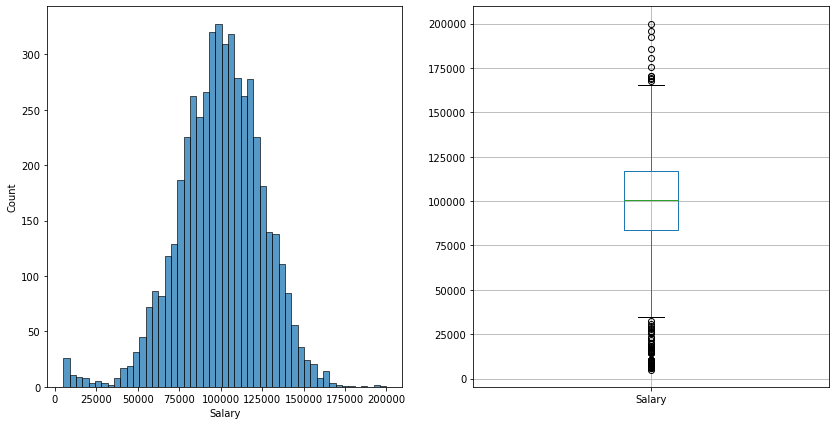

In [18]:
# Visualizing Histogram and Boxplot for the Salary Column to check for normal distribution and outliers.

plt.figure(figsize=(14, 7)) 

# For histogram
plt.subplot(121)
sns.histplot(HR_dataset['Salary'])

# For boxplot
plt.subplot(122)
HR_dataset.boxplot(column =['Salary'])

plt.show()

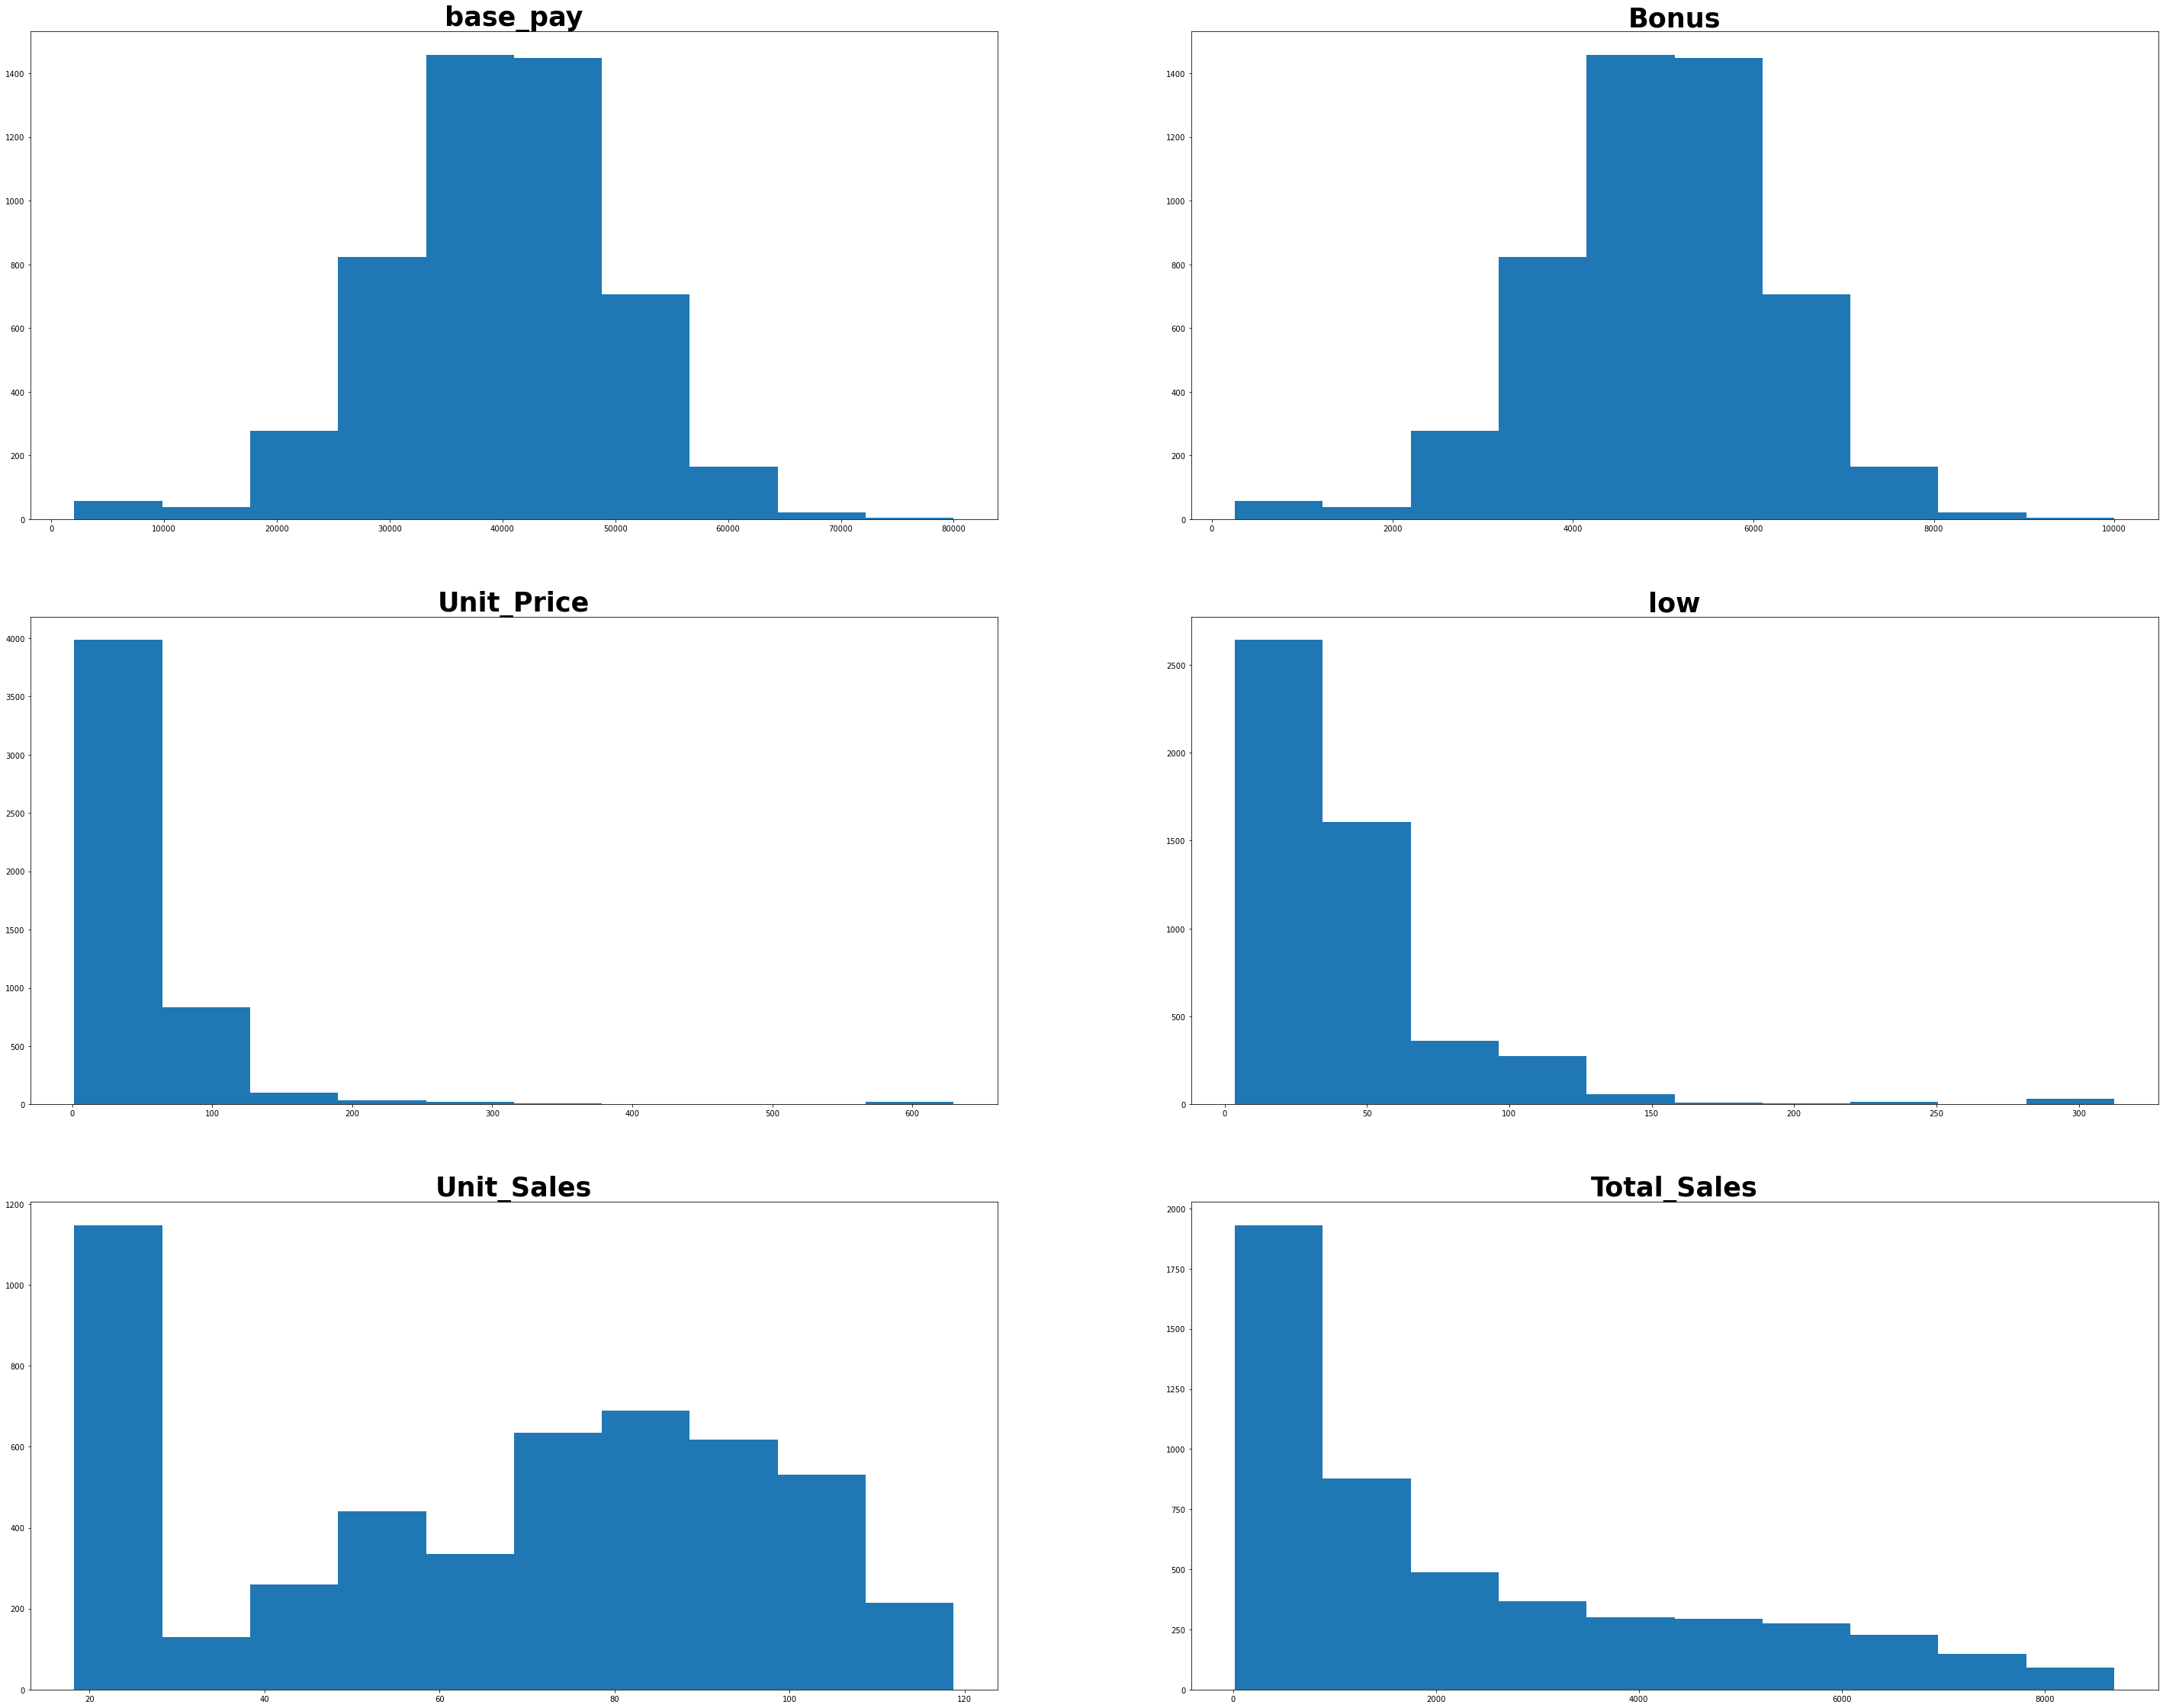

In [19]:
# Creating Subplots to visualise histogram and to check for normal distribution for several columns together.

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows = 3,
                                              ncols = 2,
                                              figsize = (50, 40))

ax1.set_title('v = 1',fontweight="bold", size=35)
ax2.set_title('v = 1',fontweight="bold", size=35)
ax3.set_title('v = 1',fontweight="bold", size=35)
ax4.set_title('v = 1',fontweight="bold", size=35)
ax5.set_title('v = 1',fontweight="bold", size=35)
ax6.set_title('v = 1',fontweight="bold", size=35)

# plot to each different axis.
ax1.hist(HR_dataset["base_pay"])
ax2.hist(HR_dataset["Bonus"])
ax3.hist(HR_dataset["Unit_Price"])
ax4.hist(HR_dataset["low"])
ax5.hist(HR_dataset["Unit_Sales"])
ax6.hist(HR_dataset["Total_Sales"]);

# Titles for each plot.
ax1.title.set_text('base_pay')
ax2.title.set_text('Bonus')
ax3.title.set_text('Unit_Price')
ax4.title.set_text('low')
ax5.title.set_text('Unit_Sales')
ax6.title.set_text('Total_Sales');


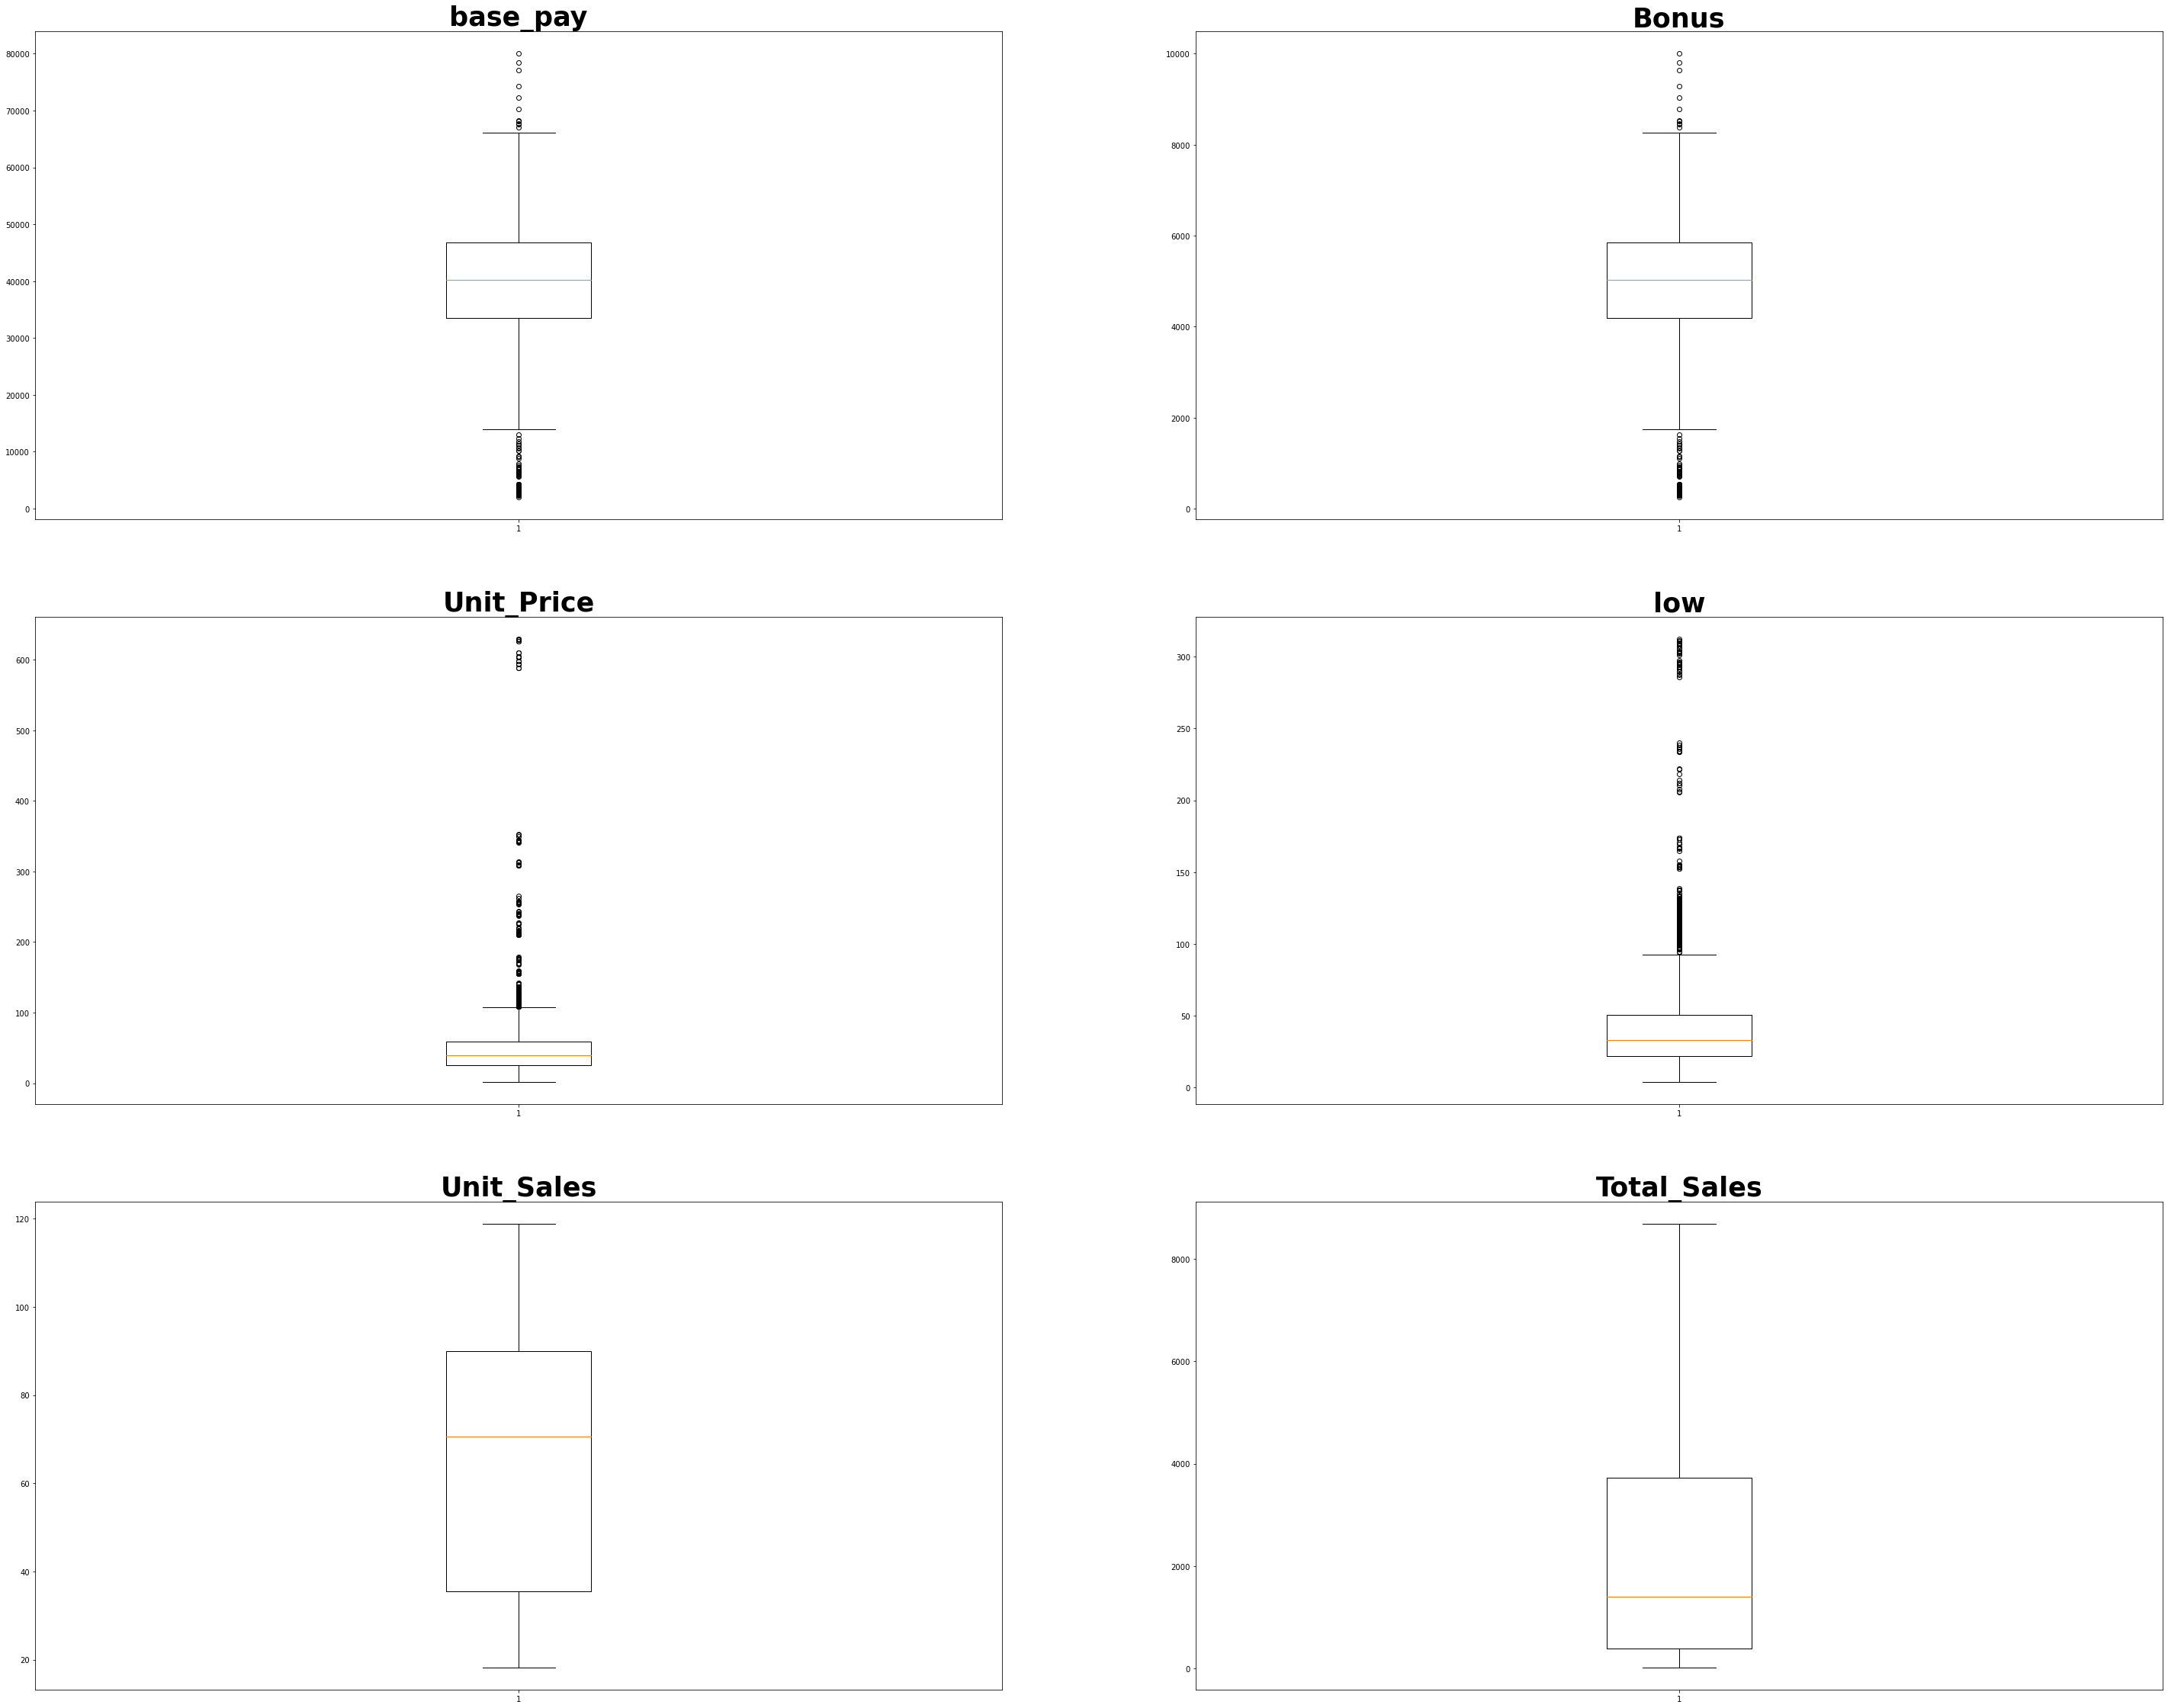

In [20]:
# Creating Subplots to visualise Boxplot and to check for outliers for several columns together.

fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(nrows = 3,
                                              ncols = 2,
                                              figsize = (50, 40))

ax1.set_title('v = 1',fontweight="bold", size=35)
ax2.set_title('v = 1',fontweight="bold", size=35)
ax3.set_title('v = 1',fontweight="bold", size=35)
ax4.set_title('v = 1',fontweight="bold", size=35)
ax5.set_title('v = 1',fontweight="bold", size=35)
ax6.set_title('v = 1',fontweight="bold", size=35)

# plot to each different axis.
ax1.boxplot(HR_dataset["base_pay"])
ax2.boxplot(HR_dataset["Bonus"])
ax3.boxplot(HR_dataset["Unit_Price"])
ax4.boxplot(HR_dataset["low"])
ax5.boxplot(HR_dataset["Unit_Sales"])
ax6.boxplot(HR_dataset["Total_Sales"]);

# Titles for each plot.
ax1.title.set_text('base_pay')
ax2.title.set_text('Bonus')
ax3.title.set_text('Unit_Price')
ax4.title.set_text('low')
ax5.title.set_text('Unit_Sales')
ax6.title.set_text('Total_Sales')

In [21]:
# From the above plots we understand that there are several columns with outliers which leads to noisy dataset.
# Hence, formualting to replace outliers with upper and lower whisker. 

def id_out(col):
    sorted(col)
    Q1, Q3 = col.quantile([0.25,0.75])
    IQR= Q3-Q1
    low_whis = Q1-(1.5 * IQR)
    up_whis = Q3+(1.5 * IQR)
    return low_whis,up_whis

In [22]:
# Implementing the above formulated logic into columns with outliers.

low, up = id_out(HR_dataset['Salary'])
HR_dataset['Salary']= np.where(HR_dataset['Salary']> up, up, HR_dataset['Salary'])
HR_dataset['Salary']= np.where(HR_dataset['Salary']< low, low, HR_dataset['Salary'])

low, up = id_out(HR_dataset['Bonus'])
HR_dataset['Bonus']= np.where(HR_dataset['Bonus']> up, up, HR_dataset['Bonus'])
HR_dataset['Bonus']= np.where(HR_dataset['Bonus']< low, low, HR_dataset['Bonus'])

low, up = id_out(HR_dataset['Unit_Price'])
HR_dataset['Unit_Price']= np.where(HR_dataset['Unit_Price']> up, up, HR_dataset['Unit_Price'])
HR_dataset['Unit_Price']= np.where(HR_dataset['Unit_Price']< low, low, HR_dataset['Unit_Price'])

low, up = id_out(HR_dataset['low'])
HR_dataset['low']= np.where(HR_dataset['low']> up, up, HR_dataset['low'])
HR_dataset['low']= np.where(HR_dataset['low']< low, low, HR_dataset['low'])

low, up = id_out(HR_dataset['base_pay'])
HR_dataset['base_pay']= np.where(HR_dataset['base_pay']> up, up, HR_dataset['base_pay'])
HR_dataset['base_pay']= np.where(HR_dataset['base_pay']< low, low, HR_dataset['base_pay'])

<AxesSubplot:>

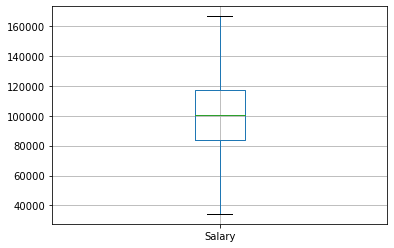

In [23]:
# Checking one Boxplot after removing Outliers.

HR_dataset.boxplot(column= ['Salary'])

## Examine the relationship between categorical variables and the dependent variable & explain.

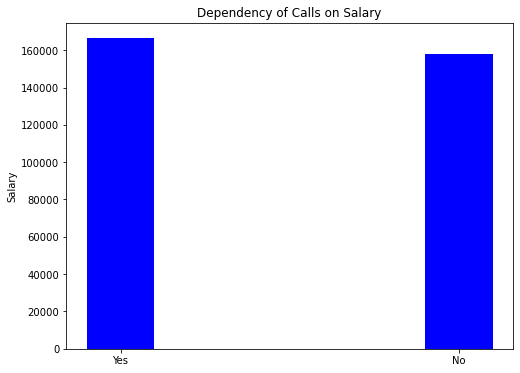

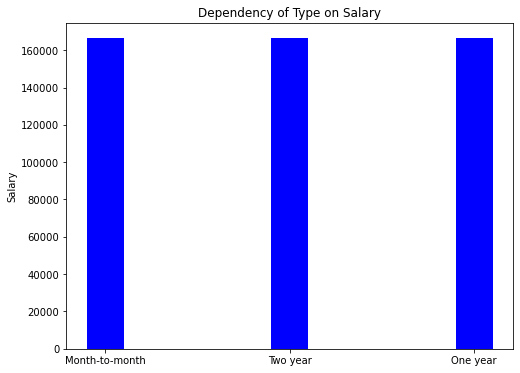

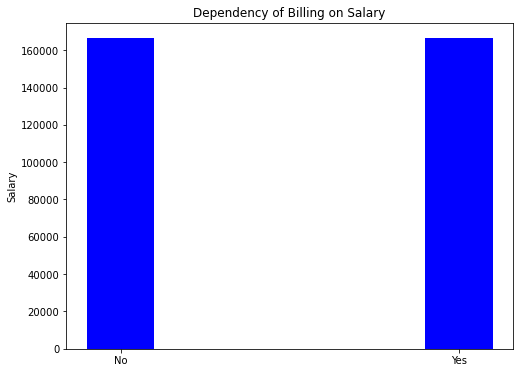

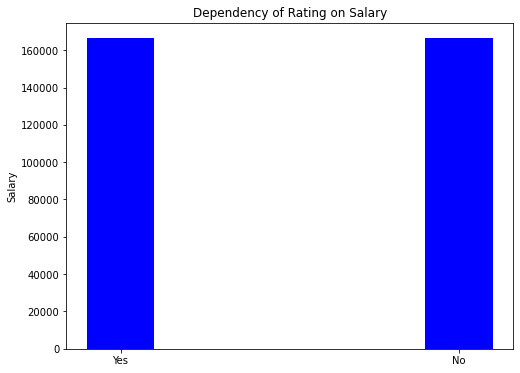

In [24]:
# PLotting Bar Graph for Calls, Type, Billing and Rating to check for their dependencies on Salary.

plt.figure(figsize=(8, 6))

plt.bar(HR_dataset['Calls'],HR_dataset['Salary'], width = 0.2, color= 'blue')
plt.title("Dependency of Calls on Salary")
plt.ylabel("Salary")
plt.show()
#------------------------------------------------#

plt.figure(figsize=(8, 6))

plt.bar(HR_dataset['Type'],HR_dataset['Salary'], width = 0.2, color= 'blue')
plt.title("Dependency of Type on Salary")
plt.ylabel("Salary")
plt.show()
#------------------------------------------------#

plt.figure(figsize=(8, 6))

plt.bar(HR_dataset['Billing'],HR_dataset['Salary'], width = 0.2, color= 'blue')
plt.title("Dependency of Billing on Salary")
plt.ylabel("Salary")
plt.show()
#------------------------------------------------#

plt.figure(figsize=(8, 6))

plt.bar(HR_dataset['Rating'],HR_dataset['Salary'], width = 0.2, color= 'blue')
plt.title("Dependency of Rating on Salary")
plt.ylabel("Salary")
plt.show()

#### From the above plotting we can say that the categorical columns have no Dependencies on the Salary Column. We can say this because there is no change in Salary with respect to other categorical columns, as visualized above.

In [25]:
# checking the info of the dataset to check the datatype .

HR_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Calls        5000 non-null   object 
 1   Type         5000 non-null   object 
 2   Billing      5000 non-null   object 
 3   Rating       5000 non-null   object 
 4   Salary       5000 non-null   float64
 5   Bonus        5000 non-null   float64
 6   Unit_Price   5000 non-null   float64
 7   low          5000 non-null   float64
 8   Unit_Sales   5000 non-null   float64
 9   Total_Sales  5000 non-null   float64
 10  Months       5000 non-null   int64  
 11  base_pay     5000 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 468.9+ KB


In [26]:
# Importing labelencoder from sklearn library.
# We are doing label encoding as we have 4 categorical columns (calls, type, billing and rating).
# We cannot train the model with the categorical columns. Hence, converting to numerical values. 
# This also helps in training the model easier.

from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
HR_dataset1 = HR_dataset.copy()
HR_dataset1['Calls'] = label_encoder.fit_transform(HR_dataset1.Calls)
HR_dataset1['Type'] = label_encoder.fit_transform(HR_dataset1.Type)
HR_dataset1['Billing'] = label_encoder.fit_transform(HR_dataset1.Billing)
HR_dataset1['Rating'] = label_encoder.fit_transform(HR_dataset1.Rating)
HR_dataset1.head()

,Calls,Type,Billing,Rating,Salary,Bonus,Unit_Price,low,Unit_Sales,Total_Sales,Months,base_pay
0,1,0,0,1,34357.708738,1717.885438,3.77,3.65,18.25,18.80,0,13743.083495
1,1,0,0,1,34357.708738,1717.885438,3.74,3.65,18.40,18.85,0,13743.083495
2,1,0,1,0,34357.708738,1717.885438,3.89,3.72,18.70,18.90,0,13743.083495
3,1,0,1,1,34357.708738,1717.885438,4.35,3.83,18.75,19.00,0,13743.083495
4,1,0,1,1,34357.708738,1717.885438,4.34,4.08,18.80,19.05,1,13743.083495


In [27]:
# Changing the datatypes to integer for data uniformity.

HR_dataset1['Salary'] = HR_dataset1['Salary'].astype(int)
HR_dataset1['Bonus'] = HR_dataset1['Bonus'].astype(int)
HR_dataset1['Unit_Price'] = HR_dataset1['Unit_Price'].astype(int)
HR_dataset1['low'] = HR_dataset1['low'].astype(int)
HR_dataset1['Unit_Sales'] = HR_dataset1['Unit_Sales'].astype(int)
HR_dataset1['Total_Sales'] = HR_dataset1['Total_Sales'].astype(int)
HR_dataset1['Months'] = HR_dataset1['Months'].astype(int)
HR_dataset1['base_pay'] = HR_dataset1['base_pay'].astype(int)
HR_dataset1['Calls'] = HR_dataset1['Calls'].astype(int)
HR_dataset1['Type'] = HR_dataset1['Type'].astype(int)
HR_dataset1['Billing'] = HR_dataset1['Billing'].astype(int)
HR_dataset1['Rating'] = HR_dataset1['Rating'].astype(int)
HR_dataset1.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Calls        5000 non-null   int32
 1   Type         5000 non-null   int32
 2   Billing      5000 non-null   int32
 3   Rating       5000 non-null   int32
 4   Salary       5000 non-null   int32
 5   Bonus        5000 non-null   int32
 6   Unit_Price   5000 non-null   int32
 7   low          5000 non-null   int32
 8   Unit_Sales   5000 non-null   int32
 9   Total_Sales  5000 non-null   int32
 10  Months       5000 non-null   int32
 11  base_pay     5000 non-null   int32
dtypes: int32(12)
memory usage: 234.5 KB


## Apply ML algorithm to the pre-processed columns and find out, which of these algorithms is best suitable for the same & explain.

#### * As the problem statement is a regression model we should use a regressor alogrithm. Hence, we will be using random forest regressor because the ensemble library is the most accurate model if we work on a large dataset.
#### * Ensemble methods are good at both performance and robustness.
#### * Performance: An ensemble can make better predictions and achieve better performance than any single contributing model.
#### * Robustness: An ensemble reduces the spread or dispersion of the predictions and model performance.
#### * Ensemble methods have Boosting, Bagging, And Stacking, which is used to reduce variance and bias to enhance the accuracy of models.
#### * And we are using randomforest because its easy to use and errors can be reduced drastically by averaging.
#### * Also hyperparameter tuning is very efficient by just changing the estimators.

In [28]:
# Importing randomforestregressor from sklearn library.
# Importing train and test split from model selection.

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [29]:
# Spliting the X and y variables for fitting the model.

np.random.seed(42)
X = HR_dataset1.drop('Salary',axis = 1)
y = HR_dataset1['Salary']

In [30]:
# Taking the test size as 20% of the total dataset for training.

X_train , X_test , y_train , y_test = train_test_split(X , y , test_size = 0.2)

In [31]:
# Checking the shape of test and train (to check for the distribution . ie, test = 20% ans train = 80%).

X_train.shape, X_test.shape, y_train.shape , y_test.shape

((4000, 11), (1000, 11), (4000,), (1000,))

In [32]:
# Fitting the model to check for the accuracy of the model and predicting the test score.

model = RandomForestRegressor(n_estimators = 3)
model.fit(X_train , y_train)
model.score(X_test , y_test)

0.9999804034048838

### The predicted accuracy is amazing as its very close to 100 and the model fits so well .

In [33]:
# To varify the predicted score it is compareed with mean_absolute_error , mean_squared_error(to check the error , as its one of the important hyper parameter of random forest).
# Naming the X_test model predict as y_pred.

y_pred = model.predict(X_test)
y_pred

array([ 87871.66666667, 101674.33333333, 102527.        ,  80955.66666667,
        74665.66666667,  45329.        ,  71529.66666667, 100206.33333333,
        99580.33333333,  89261.        , 100192.        ,  57112.66666667,
        78715.33333333,  76443.33333333, 107039.66666667, 114075.        ,
        81242.66666667, 111355.66666667,  91409.66666667,  81423.66666667,
        78870.66666667, 107337.        ,  82007.33333333,  73202.        ,
       137131.66666667,  68585.        , 121368.33333333,  61753.33333333,
       136627.66666667,  68070.33333333,  94380.66666667,  64464.33333333,
       143644.66666667, 145042.        ,  91534.        , 100779.66666667,
       114702.66666667, 126378.66666667, 157823.        ,  96003.33333333,
       114827.33333333, 122365.        ,  34357.        ,  34357.        ,
        77301.66666667, 119075.33333333, 117179.33333333, 135067.        ,
       108768.33333333, 102553.66666667, 134438.66666667, 134866.        ,
       100007.66666667, 1

In [34]:
# Comparing the Predicted value to The test value .
# The values are very close to each other which shows the model has good accuracy.

y_test

1501     87840
2586    101696
2653    102526
1055     80952
705      74646
         ...  
4711    137772
2313     98455
3214    109603
2732    103369
1926     93981
Name: Salary, Length: 1000, dtype: int32

In [35]:
# Taking an example to check the accuracy of the model

# The y predict value of the last value is

model.predict([X_test.iloc[-1,:]])

array([93978.])

In [36]:
# Similarly, y test value is

y_test.iloc[-1]

93981

##### We can see that the two values from above are very close to each other, infering that the predicted and the test scores are quiet accurate.

## CONCLUSION: From the above prediction we can infer that the components namingly, Bonus, base_pay, Total Sales, Low, Unit Sales, Unit Price are affecting the Salary Component and hence any changes to them can affect the productivity of the employee as it directly impacts the salary.

In [37]:
from sklearn.metrics import mean_absolute_error
y_preds = model.predict(X_test)
mean_absolute_error(y_test , y_preds)

32.367666666666835

In [38]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(y_test),y_test.mean())

In [39]:
y_test.mean()

99424.338

In [40]:
r2_score(y_test,y_test_mean)

0.0

In [41]:
r2_score(y_test,y_test)

1.0

In [42]:
# Mean absoulte error.

from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

32.367666666666835

In [43]:
df = pd.DataFrame(data = {'actual values':y_test,
                          'predicted values': y_preds})
df['differences'] = df['predicted values']-df['actual values']
df

,actual values,predicted values,differences
1501,87840,87871.666667,31.666667
2586,101696,101674.333333,-21.666667
2653,102526,102527.000000,1.000000
1055,80952,80955.666667,3.666667
705,74646,74665.666667,19.666667
...,...,...,...
4711,137772,137755.333333,-16.666667
2313,98455,98456.000000,1.000000
3214,109603,109615.000000,12.000000
2732,103369,103381.333333,12.333333


In [44]:
HR_dataset1.loc[1055]

Calls              1
Type               1
Billing            1
Rating             0
Salary         80952
Bonus           4047
Unit_Price        20
low               19
Unit_Sales        25
Total_Sales      284
Months            62
base_pay       32380
Name: 1055, dtype: int32

In [45]:
# Mean squared error.
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)
mse = mean_squared_error(y_test,y_preds)
mse

12524.307888888965

In [46]:
from sklearn.model_selection import cross_val_score

np.random.seed(42)
cv_r2 = cross_val_score( model , X , y , cv = 5 , scoring = None)
np.mean(cv_r2)

-0.4974916603899713

In [47]:
# Mean absoulte error
np.random.seed(42)
cv_mae = cross_val_score( model , X , y , cv = 5 , scoring = 'neg_mean_absolute_error')
cv_mae

array([-14909.23466667,  -3274.91566667,  -2927.87166667,  -3031.61533333,
       -13025.25466667])

In [48]:
# Mean squared error.
np.random.seed(42)
cv_mse = cross_val_score( model , X , y , cv = 5 , scoring = 'neg_mean_squared_error')
cv_mse

array([-3.88563881e+08, -1.41174370e+07, -1.13790471e+07, -1.24471005e+07,
       -2.83306660e+08])

In [60]:
np.random.seed(42)
X = HR_dataset1.drop('Salary',axis = 1)
y = HR_dataset1['Salary']

model = RandomForestRegressor(n_estimators = 5000)
model.fit(X_train,y_train)
model.score(X_test,y_test)

0.9999818704381451

In [61]:
y_preds = model.predict(X_test)
mae = mean_absolute_error(y_test,y_preds)
mae

21.047096800000144